In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data=pd.read_csv("week10.csv")

In [41]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [42]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749


# Check for null values

In [43]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

# Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and
comment on your observations.


In [44]:
data.dtypes["Hardness"]

dtype('float64')

In [45]:
data.dtypes["Sulfate"]

dtype('float64')

In [46]:
data.dtypes["Organic_carbon"]

dtype('float64')

In [87]:
data.describe().loc[:,['Hardness', 'Sulfate','Organic_carbon' ]]

,Hardness,Sulfate,Organic_carbon
count,2011.000000,2011.000000,2011.000000
mean,196.055749,333.347354,14.358055
std,31.899336,40.067552,3.307772
min,117.200739,230.085447,5.285688
25%,176.744938,307.632511,12.124105
50%,197.191839,332.232177,14.322019
75%,216.441070,359.330555,16.683049
max,275.985268,436.877619,23.521466


In [92]:
data1= data[['Hardness', 'Sulfate','Organic_carbon']]

<function matplotlib.pyplot.show(close=None, block=None)>

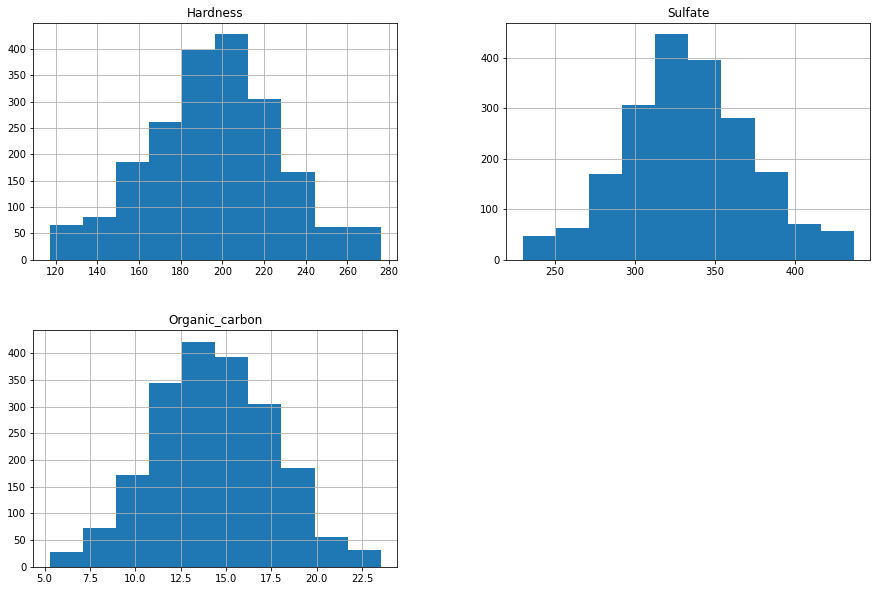

In [94]:
data1.hist(figsize=(15,10))
plt.show

Text(0.5, 1.0, 'Box plot of Hardness')

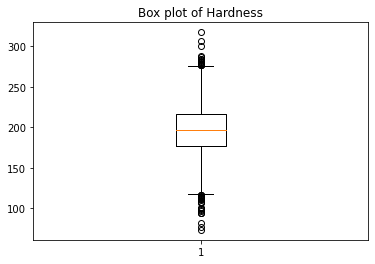

In [47]:
plt.boxplot(data["Hardness"])
plt.title("Box plot of Hardness")

In [48]:
Q1= np.percentile(data["Hardness"],25,interpolation="midpoint")
Q2= np.percentile(data["Hardness"],50,interpolation="midpoint")
Q3= np.percentile(data["Hardness"],75,interpolation="midpoint")
print("Q1:",Q1,"\n")
print("Q2:",Q2,"\n")
print("Q3:",Q3,"\n")

Q1: 176.74493765 

Q2: 197.1918394 

Q3: 216.44106975 



In [49]:
IQR=Q3-Q1
print("IQR:",IQR,"\n")

IQR: 39.6961321 



In [50]:
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print("low_limit:",low_limit,"\n")
print("upper_limit:",upper_limit,"\n")

low_limit: 117.2007395 

upper_limit: 275.9852679 



In [51]:
outlier=[]
for x in data["Hardness"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)
print('outlier values are: ',outlier)

outlier values are:  [100.4576151, 116.2993299, 300.2924758, 278.056321, 112.2994855, 276.7335689, 112.820254, 98.77164353, 280.0824107, 278.5851052, 280.0896549, 81.71089527, 113.8311122, 77.4595861, 94.09130748, 282.739017, 278.1475241, 73.49223369, 306.6274814, 106.3801125, 97.2809086, 283.9972841, 98.45293051, 107.3833271, 277.1169457, 113.5046982, 117.0573145, 110.8657883, 278.3403578, 281.5942349, 278.0363603, 100.8065197, 107.3419819, 278.0814463, 283.8958638, 116.3382781, 276.6997645, 286.5679908, 278.2317536, 111.4785818, 114.4638998, 111.9940275, 317.3381241, 114.3714503, 94.90897713, 287.9755402, 114.8075784, 277.0657128, 94.81254522]


In [52]:
data['Hardness']=np.where(data['Hardness']>upper_limit,upper_limit,np.where(data['Hardness']<low_limit,low_limit,data['Hardness']))

Text(0.5, 1.0, 'Box plot of Hardness')

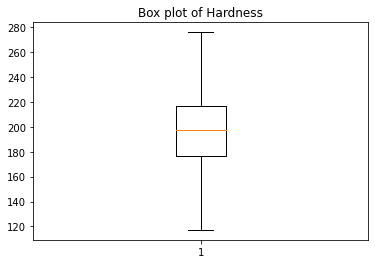

In [53]:
plt.boxplot(data["Hardness"])
plt.title("Box plot of Hardness")

outlier in sulfate

Text(0.5, 1.0, 'Box plot of Sulfate')

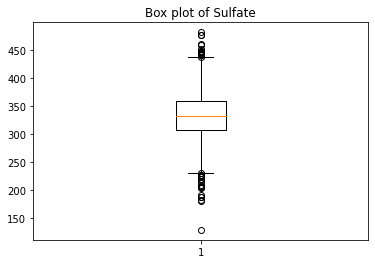

In [54]:
plt.boxplot(data["Sulfate"])
plt.title("Box plot of Sulfate")

In [63]:
Q1= np.percentile(data["Sulfate"],25,interpolation="midpoint")
Q2= np.percentile(data["Sulfate"],50,interpolation="midpoint")
Q3= np.percentile(data["Sulfate"],75,interpolation="midpoint")
print("Q1:",Q1,"\n")
print("Q2:",Q2,"\n")
print("Q3:",Q3,"\n")

Q1: 307.63251145000004 

Q2: 332.2321775 

Q3: 359.33055464999995 



In [64]:
IQR=Q3-Q1
print("IQR:",IQR,"\n")

IQR: 51.698043199999915 



In [65]:
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print("low_limit:",low_limit,"\n")
print("upper_limit:",upper_limit,"\n")

low_limit: 230.08544665000016 

upper_limit: 436.8776194499998 



In [67]:
outlier=[]
for x in data["Sulfate"]:
    if ((x<low_limit) or (x>upper_limit)):
        outlier.append(x)
print("outliers are:",outlier)

outliers are: [187.1707144, 192.0335917, 180.2067464, 444.970552, 182.3973702, 187.4241309, 209.4710584, 223.2358161, 224.212503, 445.9383912, 229.5755609, 444.3757307, 219.1489347, 219.5534368, 227.3484603, 203.4445208, 442.7614284, 206.2472294, 441.5876538, 475.7374602, 129.0, 476.5397173, 225.5166278, 460.107069, 445.3595467, 458.4410723, 214.4608338, 207.8904823, 439.7879384, 447.4179624, 205.9350906, 481.0306423, 437.6471625, 450.9144544, 227.6656353, 440.6355091, 446.7240162]


In [70]:
data["Sulfate"]=np.where(data["Sulfate"]>upper_limit,upper_limit,np.where(data["Sulfate"]<low_limit,low_limit,data["Sulfate"]))

Text(0.5, 1.0, 'box plot of sulfate')

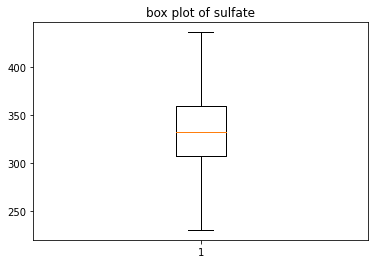

In [73]:
plt.boxplot(data["Sulfate"])
plt.title("box plot of sulfate")

outlier of Organic_carbon

Text(0.5, 1.0, 'Box plot of Organic_carbon')

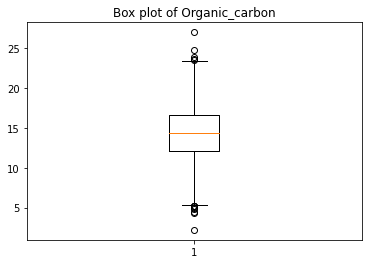

In [74]:
plt.boxplot(data["Organic_carbon"])
plt.title("Box plot of Organic_carbon")

In [78]:
Q1= np.percentile(data["Organic_carbon"],25,interpolation="midpoint")
Q2= np.percentile(data["Organic_carbon"],50,interpolation="midpoint")
Q3= np.percentile(data["Organic_carbon"],75,interpolation="midpoint")
print("Q1:",Q1,"\n")
print("Q2:",Q2,"\n")
print("Q3:",Q3,"\n")

Q1: 12.12410489 

Q2: 14.32201887 

Q3: 16.683049345 



In [79]:
IQR=Q3-Q1
print("IQR:",IQR,"\n")

IQR: 4.558944455000001 



In [80]:
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print("low_limit:",low_limit,"\n")
print("upper_limit:",upper_limit,"\n")

low_limit: 5.285688207499999 

upper_limit: 23.5214660275 



In [81]:
outlier=[]
for x in data["Organic_carbon"]:
    if ((x<low_limit) or (x>upper_limit)):
        outlier.append(x)
print("outliers are:",outlier)

outliers are: [23.91760126, 23.56964491, 2.2, 4.966861619, 4.371898608, 4.861631498, 5.218232927, 24.75539237, 5.188466455, 4.466771969, 27.00670661, 5.196716755, 5.159380308, 23.60429797]


In [82]:
data["Organic_carbon"]=np.where(data["Organic_carbon"]>upper_limit,upper_limit,np.where(data["Organic_carbon"]<low_limit,low_limit,data["Organic_carbon"]))

Text(0.5, 1.0, 'Box plot of Organic_carbon')

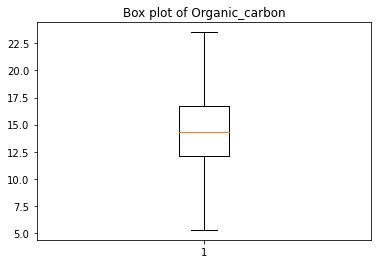

In [83]:
plt.boxplot(data["Organic_carbon"])
plt.title("Box plot of Organic_carbon")

# correlation factor

In [90]:
d1=data[["ph","Chloramines","Conductivity"]]

In [91]:
corr=d1.corr()
corr

,ph,Chloramines,Conductivity
ph,1.000000,-0.024768,0.014128
Chloramines,-0.024768,1.000000,-0.028277
Conductivity,0.014128,-0.028277,1.000000


In [ ]:
The correlation factor between ph and chloromines is -0.024768
The correlation factor between ph and conductivity is 0.014128
very weak linear relationship between the variables